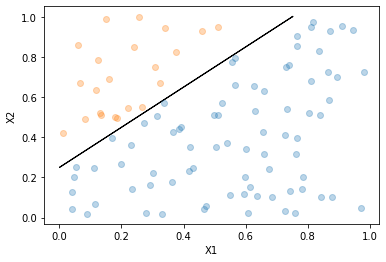

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def geradataset(tamanho=20):
    X = np.random.uniform(size=(tamanho,2))
    y = np.array(X[:,0]>X[:,1]-0.25, dtype=int)*2-1
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def perpendicular(vetor):
    rotaciona = np.array([[0,1],[-1,0]])
    perp = np.matmul(np.array(vetor),rotaciona)
    return perp

def plotahiperplano(vetor, bias=0):
    hiperplano = perpendicular(vetor)
    plt.arrow(*[0,bias], *(hiperplano-bias))

X, y = geradataset(100)
plotadataset(X, y)
plotahiperplano([1,-1],0.25)
plt.show()

In [2]:
class Adaline():
    def __init__(self):
        self.preactivated = True
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum((1 - Adaline.erro(y, ypred))**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(Adaline.erro(y, ypred), X)


In [3]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, custo=Adaline(), alpha=0.014):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = alpha
        self.maxiter = 20
        self.custo = custo
        self.whist = []
        self.chist = []
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.maxiter):
            if hasattr(self.custo, 'preactivated') and self.custo.preactivated:
                ypred = self.preactivate(X)
            else: 
                ypred = self.predict(X) 
            custo = self.custo.custo(y, ypred)
            print(custo)
            self.whist.append(self.w)
            self.chist.append(custo)
            if custo==0:
                break
            self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, Xb)
        print(self.w)
    
    def preactivate(self, X):
        Xb = Perceptron.includebias(X)
        return np.matmul(Xb, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        ypred = self.activation(a)
        return ypred


68.67964253353965
189.12598216086386
117.33715517753944
147.68502559057455
131.28425892978797
138.0416280010207
133.91920862566008
135.17886468230836
133.96017359379738
134.0241141628821
133.54760599197718
133.39623061995928
133.1441068903459
132.9879619623869
132.8262274633957
132.701821146651
132.58902219625975
132.49586118605313
132.4147645144779
132.34620398789275
[ 0.36965849  1.59093321 -1.26010055]
0.95


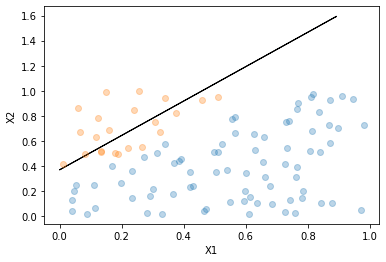

In [11]:
perceptron = Perceptron(alpha=0.01)
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

plotadataset(X, y)
plotahiperplano(perceptron.w[1:],perceptron.w[0])
plt.show()

In [12]:
whist = np.array(perceptron.whist)
chist = np.array(perceptron.chist)
whist, chist

(array([[ 0.0124963 ,  0.86431698, -0.7489207 ],
        [ 0.48653599,  1.15714396, -0.58003028],
        [ 0.26568909,  1.08823286, -0.75059192],
        [ 0.37831701,  1.18836454, -0.75117215],
        [ 0.32984569,  1.20257672, -0.82731105],
        [ 0.35823116,  1.25382753, -0.861367  ],
        [ 0.34907496,  1.28327183, -0.91035519],
        [ 0.357457  ,  1.31949144, -0.94724842],
        [ 0.35693299,  1.34899612, -0.98541446],
        [ 0.36026772,  1.37851437, -1.01876358],
        [ 0.36136238,  1.40503265, -1.05053979],
        [ 0.36318799,  1.43020775, -1.07947402],
        [ 0.36434968,  1.45343552, -1.10644629],
        [ 0.36554954,  1.47518587, -1.13128277],
        [ 0.36647825,  1.49539956, -1.1542979 ],
        [ 0.36731044,  1.51426022, -1.17555402],
        [ 0.36798563,  1.53182386, -1.1952188 ],
        [ 0.36855431,  1.54819779, -1.21339444],
        [ 0.36901161,  1.56345531, -1.23020099],
        [ 0.36937754,  1.57767739, -1.24573725]]),
 array([ 68.679642

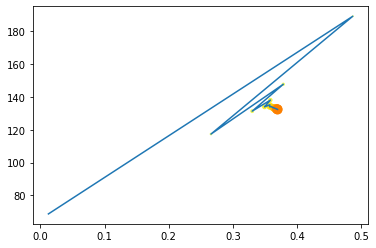

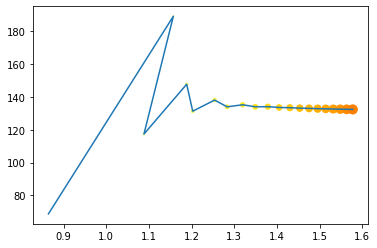

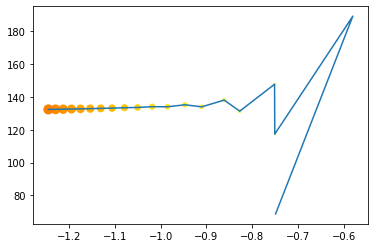

In [13]:
for i in range(whist.shape[1]):
    plt.plot(whist[:,i], chist, '-')
    seq = [j**1.5 for j in range(len(chist))]
    plt.scatter(whist[:,i], chist, s=seq, c=seq, cmap='Wistia')
    idx = np.argsort(whist[:,i])
    # plt.plot(whist[idx,i],chist[idx])
    plt.show()

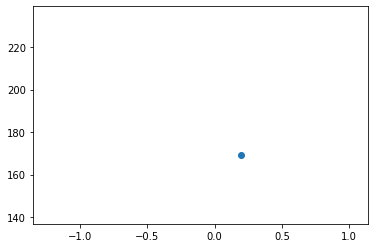

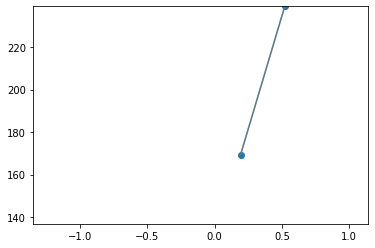

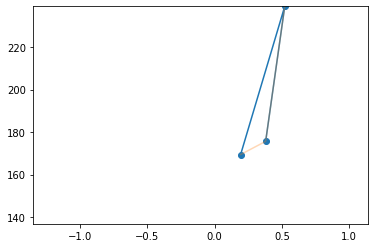

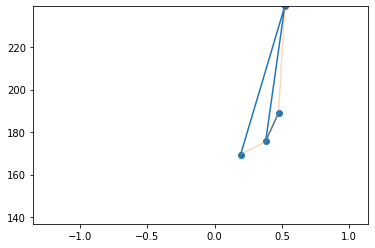

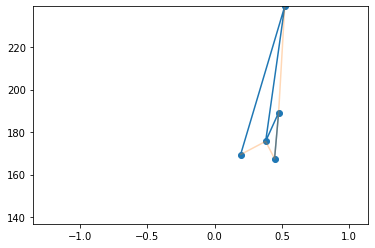

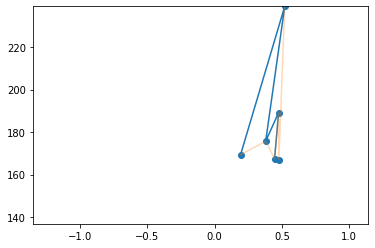

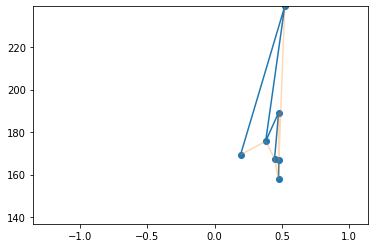

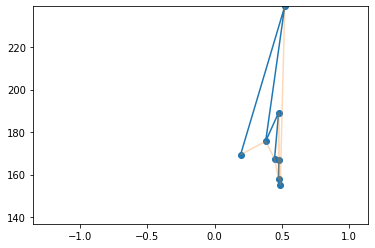

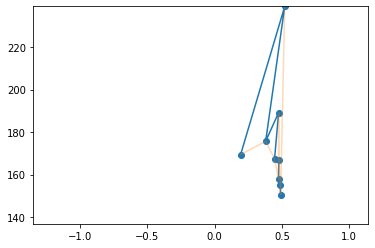

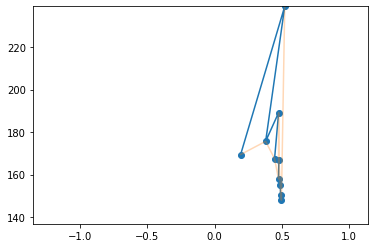

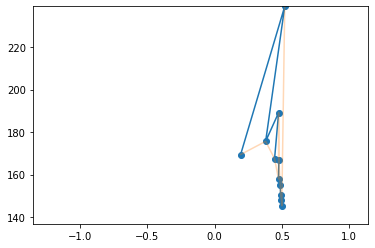

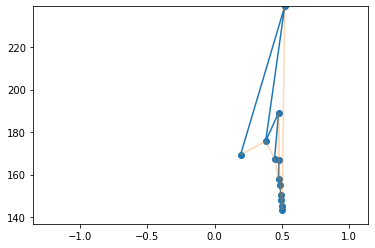

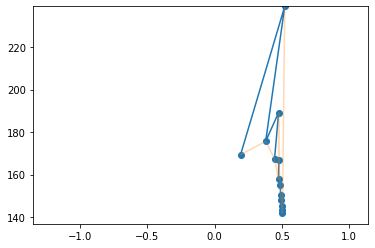

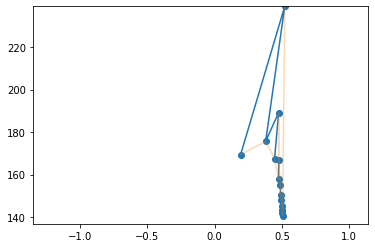

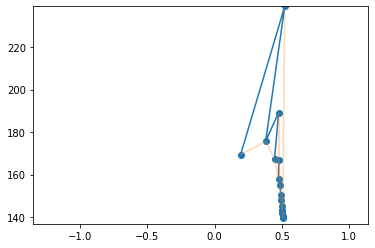

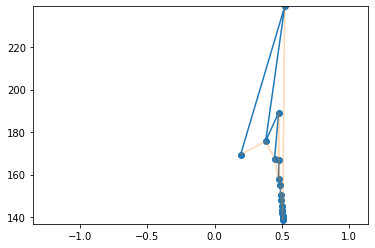

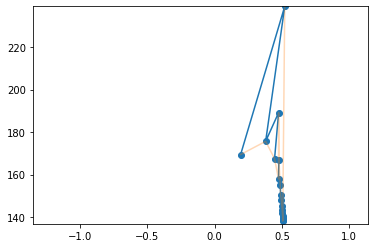

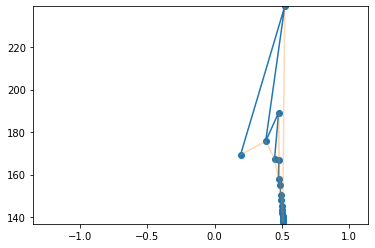

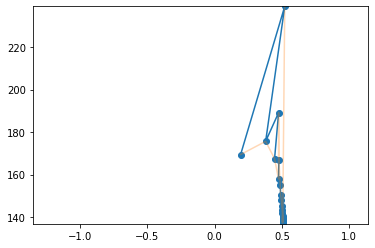

In [80]:
for i in range(1):
    for j in range(1,len(chist)):
        plt.plot(whist[:j,i], chist[:j], 'o-')
        idx = np.argsort(whist[:j,i])
        plt.plot(whist[idx,i], chist[idx], alpha=0.3)
        plt.xlim([np.min(whist), np.max(whist)])
        plt.ylim([np.min(chist), np.max(chist)])
        plt.show()